In [ ]:
from google.colab import files
files.upload()

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:

files = 'newEUBZ.csv, newEUCH.csv, newEUHK.csv, newEUJP.csv, newEUNO.csv, newEUNZ.csv, newEUSD.csv, newEUSI.csv, newEUUK.csv, \
newALBZ.csv, newALCH.csv, newALEU.csv, newALHK.csv, newALJP.csv, newALNO.csv, newALNZ.csv, newALSD.csv, newALSI.csv, newALSZ.csv, newALUK.csv, \
newCABZ.csv, newCACH.csv, newCAEU.csv, newCAHK.csv, newCAJP.csv, newCANO.csv, newCANZ.csv, newCASD.csv, newCASI.csv, newCASZ.csv, newCAUK.csv, \
newSZBZ.csv, newSZCH.csv, newSZEU.csv, newSZHK.csv, newSZJP.csv, newSZNO.csv, newSZNZ.csv, newSZSD.csv, newSZSI.csv, newSZUK.csv, \
newUKBZ.csv, newUKCH.csv, newUKHK.csv, newUKJP.csv, newUKNO.csv, newUKNZ.csv, newUKSD.csv, newUKSI.csv, \
newUSAL.csv, newUSBZ.csv, newUSCH.csv, newUSEU.csv, newUSHK.csv, newUSJP.csv, newUSNO.csv, newUSNZ.csv, newUSSD.csv, newUSSI.csv, newUSSZ.csv, newUSUK.csv'

#files = 'DEXCAUS.csv, DEXCHUS.csv, DEXNOUS.csv, DEXSDUS.csv, DEXUSAL.csv, DEXUSEU.csv, DEXUSNZ.csv, DEXUSUK.csv'
filenames = files.split(', ')
data = pd.DataFrame(columns=['DATE'])
for f in filenames:
  if f[:5] == 'newAL':
    df = pd.read_csv(f, index_col=0)
    df.columns = [f[:7]]
    data = pd.merge(df, data, how = 'outer', on=['DATE'])
#  if f[:7] == 'DEXUS':
#    df[f[:3] + f[5:7] + f[3:5]] = 1/(df[f[:7]].astype(str).replace('.', None).dropna()).astype(float)
#    df = df.drop(columns=f[:7])

data = data.set_index(['DATE'])
data = data.dropna()
print(data)
data = data.convert_dtypes()
print(data.dtypes)
#data = data.replace({'.': None})
data = data.dropna()
data = data.astype('float')
print(data.isnull().sum(), data.dtypes)

             newALUK   newALSZ   newALSI  ...   newALEU    newALCH   newALBZ
DATE                                      ...                               
2010-01-04  1.763823  1.127121  1.529727  ...  1.578780   7.475419  1.883280
2010-01-05  1.750957  1.128951  1.526414  ...  1.575194   7.465602  1.891720
2010-01-06  1.742954  1.118947  1.517575  ...  1.567526   7.429753  1.881815
2010-01-07  1.735602  1.127945  1.523887  ...  1.561300   7.447644  1.898887
2010-01-08  1.734975  1.116945  1.512367  ...  1.557496   7.406596  1.881319
...              ...       ...       ...  ...       ...        ...       ...
2019-11-08  1.866064  1.454771  1.982930  ...  1.607674  10.206303  6.061424
2019-11-12  1.877739  1.450336  1.989045  ...  1.609261  10.234590  6.097283
2019-11-13  1.879666  1.448104  1.994730  ...  1.610892  10.280047  6.115064
2019-11-14  1.899558  1.456932  2.009145  ...  1.624779  10.353245  6.181711
2019-11-15  1.894420  1.454185  1.997357  ...  1.622026  10.290015  6.161087

In [17]:
data_5days_max = pd.DataFrame()
data_5days_max = data.rolling(window = 6).max()
data_5days_max.columns = data_5days_max.columns + ' 5daysmax'

data_5days_max_forward = pd.DataFrame()
data_5days_max_forward = data.sort_index(ascending=False).rolling(window = 6).max()
data_5days_max_forward.columns = data_5days_max_forward.columns + ' 5daysmax forward'
data_5days_max_forward = data_5days_max_forward.sort_index(ascending=True)

data_5days_min = pd.DataFrame()
data_5days_min = data.rolling(window = 6).min()
data_5days_min.columns = data_5days_min.columns + ' 5daysmin'

data_5days_min_forward = pd.DataFrame()
data_5days_min_forward = data.sort_index(ascending=False).rolling(window = 6).min()
data_5days_min_forward.columns = data_5days_min_forward.columns + ' 5daysmin forward'
data_5days_min_forward = data_5days_min_forward.sort_index(ascending=True)

data_5days_max = data_5days_max.dropna()
data_5days_min = data_5days_min.dropna()
data_5days_max_forward = data_5days_max_forward.dropna()
data_5days_min_forward = data_5days_min_forward.dropna()

In [18]:
total_data = pd.concat([data, data_5days_max, data_5days_min, data_5days_max_forward, data_5days_min_forward], axis = 1)
total_data = total_data.dropna()

is_max = pd.DataFrame()
for c in data.columns:
  is_max[c] = ((total_data[c] == total_data[c + ' 5daysmax']) & (total_data[c] == total_data[c + ' 5daysmax forward'])).astype(int)

is_min = pd.DataFrame()
for c in data.columns:
  is_min[c] = ((total_data[c] == total_data[c + ' 5daysmin']) & (total_data[c] == total_data[c + ' 5daysmin forward'])).astype(int)
is_max, is_min


(            newALUK  newALSZ  newALSI  ...  newALEU  newALCH  newALBZ
 2010-01-11        0        0        0  ...        0        0        0
 2010-01-12        0        0        0  ...        0        0        0
 2010-01-13        0        0        0  ...        0        0        0
 2010-01-14        0        0        0  ...        0        0        0
 2010-01-15        0        0        0  ...        0        0        0
 ...             ...      ...      ...  ...      ...      ...      ...
 2019-11-01        0        0        0  ...        0        0        0
 2019-11-04        0        0        0  ...        0        0        0
 2019-11-05        0        0        0  ...        0        0        0
 2019-11-06        0        0        0  ...        0        0        0
 2019-11-07        0        0        0  ...        0        0        0
 
 [2462 rows x 11 columns],
             newALUK  newALSZ  newALSI  ...  newALEU  newALCH  newALBZ
 2010-01-11        0        1        0  ...     

In [19]:
# after the max or min, the 6th day can compare

for c in data.columns:
  is_max[c] = data[c] * (is_max[c].shift(6))
prev_max = is_max.replace(to_replace=0, method='ffill')
prev_max.columns = prev_max.columns + '_prev_max'

for c in data.columns:
  is_min[c] = data[c] * (is_min[c].shift(6))
prev_min = is_min.replace(to_replace=0, method='ffill')
prev_min.columns = prev_min.columns + '_prev_min'

prev_max, prev_min.tail(20)

(            newALUK_prev_max  ...  newALBZ_prev_max
 2010-01-11               NaN  ...               NaN
 2010-01-12               NaN  ...               NaN
 2010-01-13               NaN  ...               NaN
 2010-01-14               NaN  ...               NaN
 2010-01-15               NaN  ...               NaN
 ...                      ...  ...               ...
 2019-11-01          1.879126  ...          5.882353
 2019-11-04          1.879126  ...          5.882353
 2019-11-05          1.879126  ...          5.882353
 2019-11-06          1.879126  ...          5.882353
 2019-11-07          1.879126  ...          5.882353
 
 [2462 rows x 11 columns],             newALUK_prev_min  ...  newALBZ_prev_min
 2019-10-10          1.797754  ...          6.168193
 2019-10-11          1.797754  ...          6.168193
 2019-10-15          1.797754  ...          6.142667
 2019-10-16          1.797754  ...          6.142667
 2019-10-17          1.882948  ...          6.142667
 2019-10-18       

In [20]:
# find first time over max price
first_time_over_max = pd.DataFrame()
over_max = pd.DataFrame()
below_max = pd.DataFrame()
below_min = pd.DataFrame()
above_min = pd.DataFrame()
first_time_below_min = pd.DataFrame()

price_max_min = pd.concat([data, prev_max, prev_min], axis=1)
price_max_min = price_max_min.dropna()

for c in data.columns:
  over_max[c +'_over_max'] = ((price_max_min[c] > price_max_min[c + '_prev_max']) & (price_max_min[c + '_prev_max'] > 0)).astype(int)
  below_max[c + '_below_max'] = ((price_max_min[c] < price_max_min[c + '_prev_max']) & (price_max_min[c + '_prev_max'] > 0)).astype(int)
  below_min[c +'_below_min'] = ((price_max_min[c] < price_max_min[c + '_prev_min']) & (price_max_min[c + '_prev_min'] > 0)).astype(int)
  above_min[c +'_above_min'] = ((price_max_min[c] > price_max_min[c + '_prev_min']) & (price_max_min[c + '_prev_min'] > 0)).astype(int) 
  
  first_time_below_min[c +'_first_below_min'] = below_min[c +'_below_min'] - below_min[c + '_below_min'].shift(1)
  first_time_below_min[c +'_first_below_min'] = first_time_below_min[c + '_first_below_min'].replace(-1, 0)

  first_time_over_max[c + '_first_over_max'] = over_max[c +'_over_max'] - over_max[c + '_over_max'].shift(1)
  first_time_over_max[c + '_first_over_max'] = first_time_over_max[c + '_first_over_max'].replace(-1,0)
#over_max, below_max, first_time_over_max, first_time_over_max.shape

In [21]:
over_times = first_time_over_max[first_time_over_max.apply(lambda x: x.sum() >= 1, axis=1)].values.sum()
below_times = first_time_below_min[first_time_below_min.apply(lambda x: x.sum() >= 1, axis=1)].values.sum()
over_times, below_times

(2042.0, 2021.0)

In [22]:
data_profit = data.apply(lambda x: (x/x.shift(1) - 1), axis = 0) 
data_profit.columns = data_profit.columns + '_profit'
data_profit = data_profit.dropna()

data_nextweek_profit = data_profit.rolling(window=6).sum() - data_profit
data_nextweek_profit = data_nextweek_profit.dropna()
data_nextweek_profit.columns = data_nextweek_profit.columns + '_nextweek_profit'

In [23]:
# analysis correlationship
first_time_over_max['total first over'] = first_time_over_max.apply(lambda x: x.sum(), axis = 1)
first_time_below_min['total first below'] = first_time_below_min.apply(lambda x: x.sum(), axis = 1)
over_max['total_up'] = over_max.apply(lambda x: x.sum(), axis = 1)
below_min['total_down'] = below_min.apply(lambda x: x.sum(), axis = 1)
below_max['total_below_max'] = below_max.apply(lambda x: x.sum(), axis = 1)
above_min['total_above_min'] = above_min.apply(lambda x: x.sum(), axis = 1)

data_over_below_nextweek_profit = pd.concat([data_profit, over_max, below_min, below_max, above_min, first_time_over_max, first_time_below_min, data_nextweek_profit], axis = 1)

In [24]:
data_over_below_nextweek_profit

,newALUK_profit,newALSZ_profit,newALSI_profit,newALSD_profit,newALNZ_profit,newALNO_profit,newALJP_profit,newALHK_profit,newALEU_profit,newALCH_profit,newALBZ_profit,newALUK_over_max,newALSZ_over_max,newALSI_over_max,newALSD_over_max,newALNZ_over_max,newALNO_over_max,newALJP_over_max,newALHK_over_max,newALEU_over_max,newALCH_over_max,newALBZ_over_max,total_up,newALUK_below_min,newALSZ_below_min,newALSI_below_min,newALSD_below_min,newALNZ_below_min,newALNO_below_min,newALJP_below_min,newALHK_below_min,newALEU_below_min,newALCH_below_min,newALBZ_below_min,total_down,newALUK_below_max,newALSZ_below_max,newALSI_below_max,newALSD_below_max,newALNZ_below_max,...,newALHK_above_min,newALEU_above_min,newALCH_above_min,newALBZ_above_min,total_above_min,newALUK_first_over_max,newALSZ_first_over_max,newALSI_first_over_max,newALSD_first_over_max,newALNZ_first_over_max,newALNO_first_over_max,newALJP_first_over_max,newALHK_first_over_max,newALEU_first_over_max,newALCH_first_over_max,newALBZ_first_over_max,total first over,newALUK_first_below_min,newALSZ_first_below_min,newALSI_first_below_min,newALSD_first_below_min,newALNZ_first_below_min,newALNO_first_below_min,newALJP_first_below_min,newALHK_first_below_min,newALEU_first_below_min,newALCH_first_below_min,newALBZ_first_below_min,total first below,newALUK_profit_nextweek_profit,newALSZ_profit_nextweek_profit,newALSI_profit_nextweek_profit,newALSD_profit_nextweek_profit,newALNZ_profit_nextweek_profit,newALNO_profit_nextweek_profit,newALJP_profit_nextweek_profit,newALHK_profit_nextweek_profit,newALEU_profit_nextweek_profit,newALCH_profit_nextweek_profit,newALBZ_profit_nextweek_profit
2010-01-05,-0.007295,0.001623,-0.002166,0.002951,0.002996,-0.003315,-0.012642,-0.000978,-0.002271,-0.001313,0.004482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,-0.004571,-0.008862,-0.005790,-0.007461,-0.005276,-0.008166,0.006414,-0.005237,-0.004868,-0.004802,-0.005236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,-0.004218,0.008042,0.004159,0.009474,-0.001798,0.007813,0.010740,0.002200,-0.003972,0.002408,0.009072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,-0.000361,-0.009752,-0.007560,-0.006345,-0.003659,-0.009777,-0.011926,-0.005245,-0.002436,-0.005512,-0.009252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,0.001203,-0.021962,-0.012766,-0.021421,0.003204,-0.020596,-0.016843,-0.008322,0.004080,-0.008444,-0.008970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-08,0.002924,0.007700,0.006871

In [92]:
alldata = pd.DataFrame()
for c in data.columns:
  forex = c
  forex_alldata = data_over_below_nextweek_profit[[c +'_profit', c + '_first_over_max', c + '_first_below_min', 'total_up', \
                                                  'total_down', 'total_below_max', 'total_above_min', 'total first over',
                                                  'total first below', c + '_profit_nextweek_profit']]                                        
  forex_alldata = forex_alldata.dropna()
  new_columns = [x.replace(c+"_", "") for x in list(forex_alldata.columns)]
  forex_alldata.columns = new_columns
  alldata = pd.concat([alldata, forex_alldata])
alldata = alldata.reset_index()


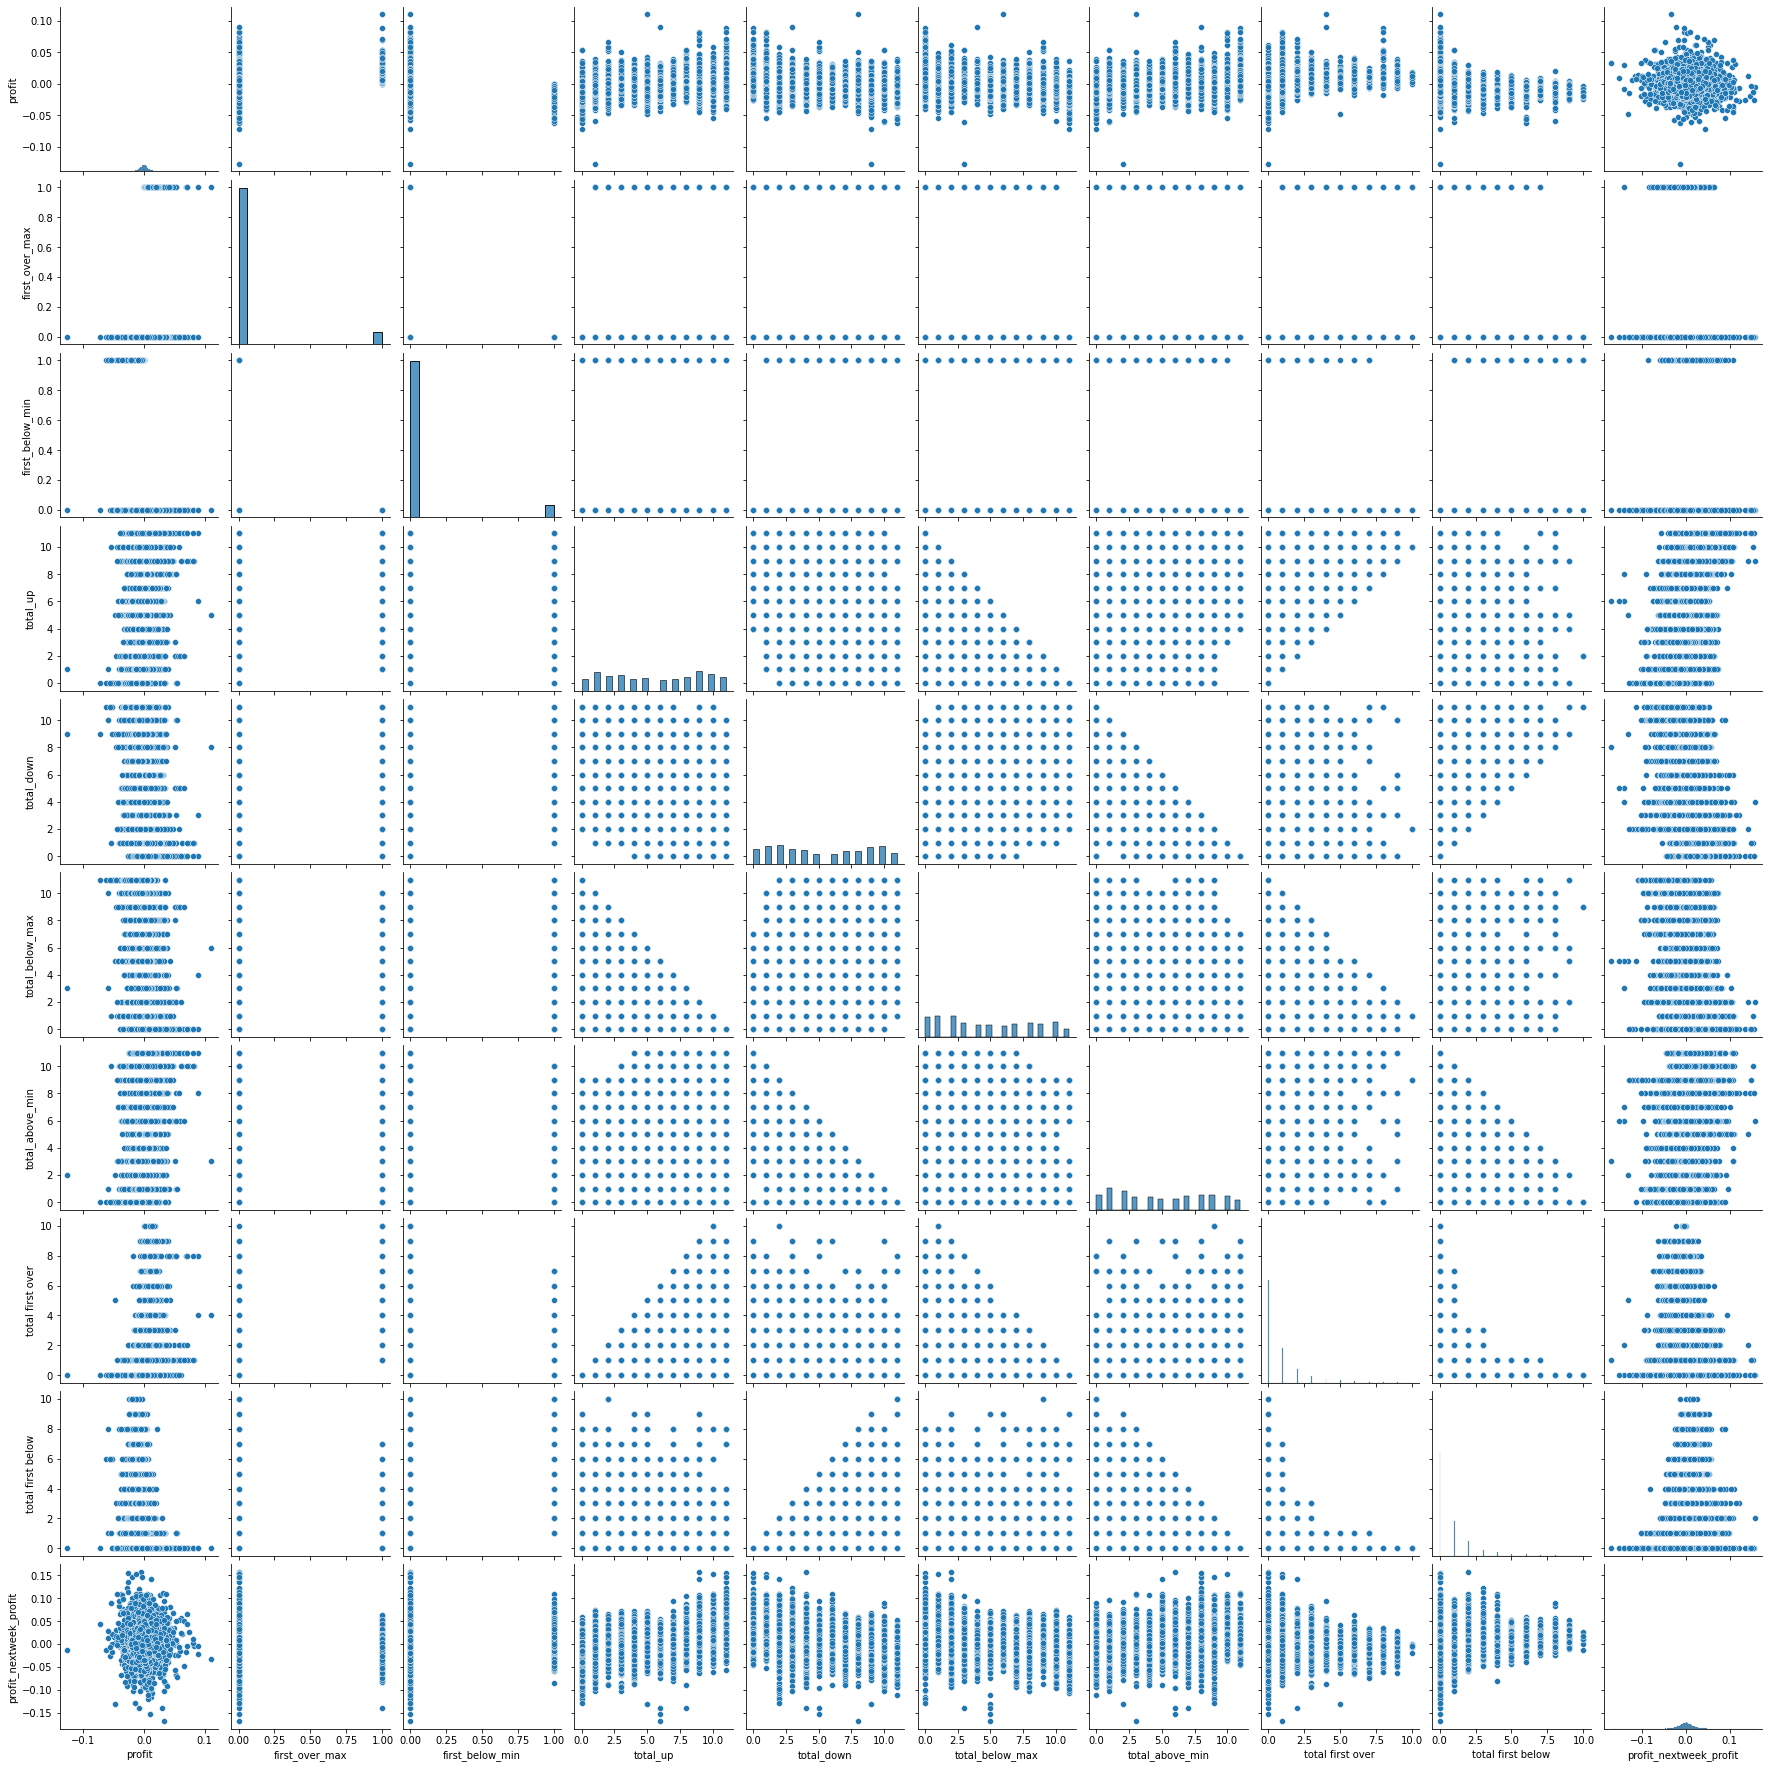

In [119]:
sns.pairplot(alldata)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


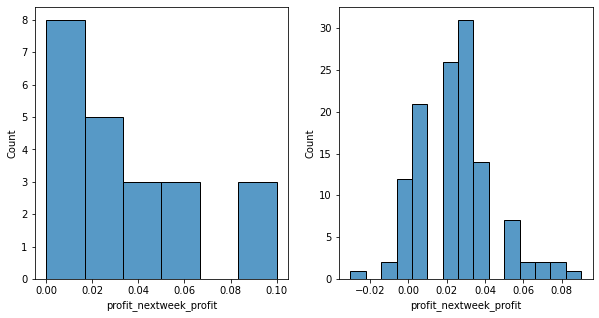

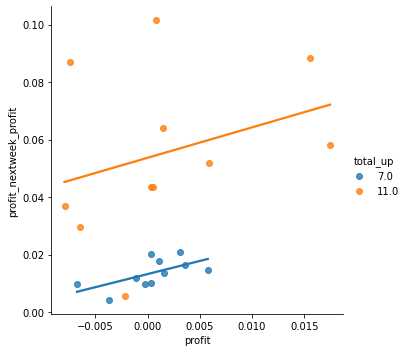

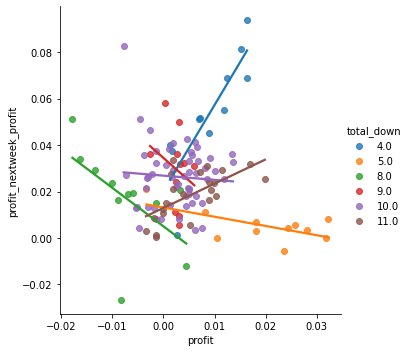

In [120]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
#plt.subplots_adjust(hspace=1)

selected_data_up = alldata[(alldata['total_above_min'] > 6) & (alldata['total_above_min'] < 8) \
                              & (alldata['total_up'] > 4) & (alldata['total_down'] == 0)]
selected_data_down = alldata[(alldata['total_below_max'] > 6) & (alldata['total_below_max'] <= 8) \
                              & (alldata['total_down'] > 3) & (alldata['total_up'] == 0)]
selected_data_down['profit'] = selected_data_down['profit'] * -1
selected_data_down['profit_nextweek_profit'] = selected_data_down['profit_nextweek_profit'] * -1

sns.histplot(round(selected_data_up['profit_nextweek_profit'], 2), ax=axes[0])
sns.histplot(round(selected_data_down['profit_nextweek_profit'], 2), ax=axes[1])
sns.lmplot(x = 'profit', y = 'profit_nextweek_profit', data = selected_data_up, hue = 'total_up', ci = None)
sns.lmplot(x = 'profit', y = 'profit_nextweek_profit', data = selected_data_down, hue = 'total_down', ci = None)

In [112]:
!pip install statsmodels
from statsmodels.formula.api import ols


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [114]:
model = ols("profit_nextweek_profit ~  profit + total_up", data=alldata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     profit_nextweek_profit   R-squared:                       0.257
Model:                                OLS   Adj. R-squared:                  0.257
Method:                     Least Squares   F-statistic:                     4636.
Date:                    Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                            14:49:38   Log-Likelihood:                 69433.
No. Observations:                   26807   AIC:                        -1.389e+05
Df Residuals:                       26804   BIC:                        -1.388e+05
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0163      0.000    -77.373      0.000      -0.017      -0.016
profit        -0.3404      0.012    -28.001      0.000      -0.364      -0.317
total_up       0.0031   3.23e-05     96.222      0.000       0.003       0.003
==============================================================================
Omnibus:                     2765.587   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16910.996
Skew:                           0.304   Prob(JB):                         0.00
Kurtosis:                       6.843   Cond. No.                         730.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
model = ols("profit_nextweek_profit ~  profit + total_up + total_above_min + total_down", data=alldata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     profit_nextweek_profit   R-squared:                       0.323
Model:                                OLS   Adj. R-squared:                  0.323
Method:                     Least Squares   F-statistic:                     3199.
Date:                    Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                            14:51:10   Log-Likelihood:                 70683.
No. Observations:                   26807   AIC:                        -1.414e+05
Df Residuals:                       26802   BIC:                        -1.413e+05
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0200      0.001     25.725      0.000       0.018       0.022
profit             -0.3870      0.012    -33.055      0.000      -0.410      -0.364
total_up            0.0022   4.22e-05     51.588      0.000       0.002       0.002
total_above_min    -0.0024    7.1e-05    -33.188      0.000      -0.002      -0.002
total_down         -0.0036   7.31e-05    -49.562      0.000      -0.004      -0.003
==============================================================================
Omnibus:                     2881.879   Durbin-Watson:                   0.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21026.178
Skew:                           0.249   Prob(JB):                         0.00
Kurtosis:                       7.310   Cond. No.                     1.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""